In [1]:
import pandas as pd
data_type = pd.read_csv('data_type.csv')

In [2]:
data_type.fillna('',inplace=True)

In [3]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [4]:
data_type.head()

,StoreID,TransactionID,Line,Sales,Count,Date,SKU,Type
0,A29,11-7270-00007-00057,36,850.0,1.0,3/11/12 00:00,A21773,
1,A29,11-7270-00007-00057,39,1500.0,1.0,3/11/12 00:00,A18009,
2,A29,11-7270-00007-00057,40,1500.0,1.0,3/11/12 00:00,A25592,
3,A29,11-7270-00007-00057,41,1600.0,1.0,3/11/12 00:00,A1449,
4,A29,11-7270-00007-00057,42,1600.0,1.0,3/11/12 00:00,A1449,


In [6]:
print data_type.shape
print len(data_type.StoreID.unique())
print len(data_type.TransactionID.unique())
print len(data_type.Line.unique())
print len(data_type.Date.unique())
print len(data_type.SKU.unique())

(1041577, 8)
73
192963
599
2
15179


In [8]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data_type.describe()

,Line,Sales,Count
count,1041577.000,1041577.000,1041577.000
mean,10.779,1762.579,0.906
std,15.514,3548.541,1.116
min,1.000,-99995.000,-120.000
25%,3.000,450.000,1.000
50%,7.000,1300.000,1.000
75%,14.000,2195.000,1.000
max,823.000,99995.000,120.000


#### Total Sales and Total Count on Store Level

In [47]:
q = '''
    select
        StoreID, count(distinct TransactionID) as '# of transactions', count(distinct SKU) as '# of SKUs',
        sum(Sales) as 'Total Sales', sum(Count) as 'Total Count', sum(Sales)/count(distinct TransactionID) as 'Average Sales per Basket'
    from
        data_type
    group by
        StoreID
    '''
df1 = pysqldf(q)

In [48]:
df1.head()

,StoreID,# of transactions,# of SKUs,Total Sales,Total Count,Average Sales per Basket
0,A01,3442,2538,24011087.000,14478.000,6975.911
1,A02,1727,2402,19792050.998,8605.000,11460.365
2,A03,1759,2301,18776726.599,8993.000,10674.660
3,A05,2497,3018,24202604.295,12257.000,9692.673
4,A06,3513,2968,24450642.000,13024.000,6960.046


In [49]:
df1.describe()

,# of transactions,# of SKUs,Total Sales,Total Count,Average Sales per Basket
count,73.000,73.000,73.000,73.000,73.000
mean,2643.329,2706.740,25148793.416,12931.205,9483.860
std,1156.019,806.736,11481754.438,6018.502,1856.601
min,84.000,22.000,354744.000,851.000,4223.143
25%,1759.000,2333.000,18491938.995,8993.000,8189.349
50%,2582.000,2754.000,24011087.000,12257.000,9692.673
75%,3440.000,3152.000,30474926.542,15617.000,10992.304
max,5978.000,4794.000,65150873.594,35107.000,13251.089


For each store, on average, it will have 2600 transactions and 2700 unique SKUs will be sold. The average sales per basket is 9500$.

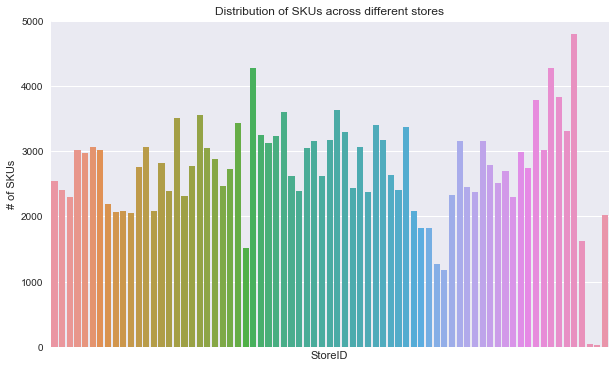

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))
ax = sns.barplot(x='StoreID',y='# of SKUs',data=df1)
plt.ylabel('# of SKUs')
plt.ylim(0,5000)
plt.title('Distribution of SKUs across different stores')
plt.tick_params(axis='x',bottom='off',labelbottom='off')


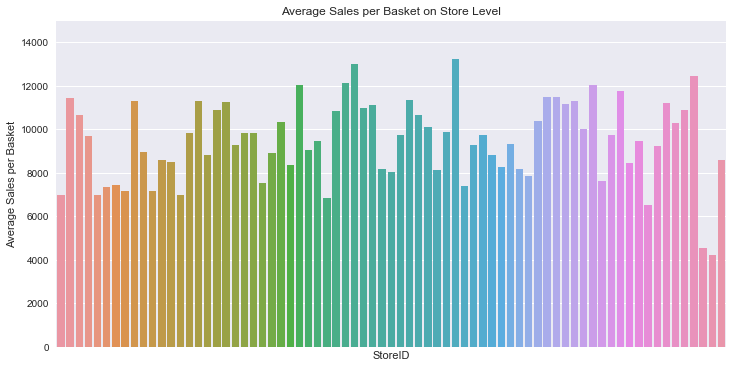

In [51]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='StoreID',y='Average Sales per Basket',data=df1)
plt.ylabel('Average Sales per Basket')
plt.ylim(0,15000)
plt.title('Average Sales per Basket on Store Level')
plt.tick_params(axis='x',bottom='off',labelbottom='off')

In [52]:
df1[df1['# of SKUs']<200]

,StoreID,# of transactions,# of SKUs,Total Sales,Total Count,Average Sales per Basket
70,A85,182,38,824505.000,1687.000,4530.247
71,A97,84,22,354744.000,851.000,4223.143


 Normally, in each store, it will sell 2500 unique SKUs on average and average sales per basket should around 10000\$. But for store A85 and A97, it only sold 38 and 22 unique SKUs, and average sales per basket is around 4500\$, which is abnoraml. We need investigaete these two stores and find out what happened.

<br><br>

#### Total Sales and Total Count on SKU Level

In [93]:
q = '''
    select
        SKU, count(distinct StoreID) as '# of Stores', count(distinct TransactionID) as '# of transactions',
        sum(Sales) as 'Total Sales', sum(Count) as 'Total Count', sum(Sales)/sum(Count) as 'Unit Price',
        sum(Sales)/count(distinct TransactionID) as 'Average Sales per Basket For Specific SKU'
    from
        data_type
    group by
        SKU
    '''
df2 = pysqldf(q)

In [94]:
df2.head()

,SKU,# of Stores,# of transactions,Total Sales,Total Count,Unit Price,Average Sales per Basket For Specific SKU
0,A1,26,68,94682.000,78.000,1213.872,1392.382
1,A10000,1,1,1995.000,1.000,1995.000,1995.000
2,A10001,1,3,5085.000,3.000,1695.000,1695.000
3,A10002,1,1,5000.000,1.000,5000.000,5000.000
4,A10003,11,21,57925.000,22.000,2632.955,2758.333


In [95]:
df2.describe()

,# of Stores,# of transactions,Total Sales,Total Count,Unit Price,Average Sales per Basket For Specific SKU
count,15179.000,15179.000,15179.000,15179.000,15094.000,15179.000
mean,13.017,45.379,120947.488,62.190,5651.830,6248.630
std,17.173,326.368,454463.802,524.992,7720.110,8047.038
min,1.000,1.000,0.000,0.000,0.015,0.000
25%,2.000,2.000,9995.000,2.000,1696.462,2000.000
50%,5.000,6.000,30990.000,7.000,3000.000,3500.000
75%,18.000,26.000,92972.500,32.000,6795.000,7500.000
max,73.000,26190.000,19049707.400,35579.000,99900.000,103344.828


For specific SKU, on average ,it wil be sold across 13 stores and 45 transactions. The average unit price for each SKU is 5600$/item.

In [64]:
df2[df2['Total Count']==0].head()

,SKU,# of Stores,# of transactions,Total Sales,Total Count,Unit Price,Average Sales per Basket
67,A10108,1,1,0.000,0.000,nan,0.000
247,A10390,1,1,0.000,0.000,nan,0.000
374,A10576,1,1,0.000,0.000,nan,0.000
396,A1061,1,1,0.000,0.000,nan,0.000
766,A11189,1,1,0.000,0.000,nan,0.000


There are 85 SKUs where Total Sales=0 and Total Count=0, meaning that the items were all returned after purchases.

In [67]:
df2[df2['# of transactions']>5000]

,SKU,# of Stores,# of transactions,Total Sales,Total Count,Unit Price,Average Sales per Basket
7016,A20874,71,5528,4639635.000,9373.000,495.000,839.297
7604,A21771,64,18411,6748400.000,23434.000,287.975,366.542
9873,A25312,71,8516,8657850.000,13014.000,665.272,1016.657
10608,A2854,71,8413,7008300.000,15574.000,450.000,833.032
11106,A3664,62,26190,7753600.000,30904.000,250.893,296.052
12491,A5821,73,8187,1883550.000,12557.000,150.000,230.066


The specific product will be sold in 45 transactions across 13 stores on average. But some SKUs are pretty popular, they are sold in over 5000 transactions across over 60 stores. Their total sales are high and their unit price are low, meaning that they are some low-price but popular products.

<br><br>

#### Total Sales and Total Count on Transaction Level

In [80]:
q = '''
    select
        TransactionID, count(distinct SKU) as Number_of_SKUs,
        sum(Sales) as 'Total Sales', sum(Count) as 'Total Count'
    from
        data_type
    group by
        TransactionID
    '''
df3 = pysqldf(q)

In [81]:
df3.head()

,TransactionID,Number_of_SKUs,Total Sales,Total Count
0,11-0160-00019-00003,1,3500.000,10.000
1,11-0160-00019-00007,2,5000.000,15.000
2,11-0160-00019-00008,2,5000.000,15.000
3,11-0160-00019-00010,2,5000.000,11.000
4,11-0160-00019-00011,3,7195.000,16.000


In [82]:
df3.describe()

,Number_of_SKUs,Total Sales,Total Count
count,192963.000,192963.000,192963.000
mean,3.570,9514.062,4.892
std,3.567,11964.859,5.667
min,1.000,0.000,0.000
25%,1.000,2500.000,1.000
50%,2.000,5595.000,3.000
75%,5.000,12120.000,6.000
max,251.000,1011399.000,600.000


Avearge number of unique SKUs in each transaction is 4, average total sales in each transaction 9500, and average number of items bought in each transaction is 5.

In [29]:
df3[df3['Total Sales']==1011399]

,TransactionID,# of SKUs,Total Sales,Total Count
188984,12-7681-00002-00002,132,1011399.000,150.000


In [30]:
df3[df3['Total Count']==600]

,TransactionID,# of SKUs,Total Sales,Total Count
185051,12-7465-00017-00101,1,36000.000,600.000


##### Distribution of Transactions Acorss Number of SKUs in Each Transaction

In [85]:
q = '''
    select
        Number_of_SKUs, count(distinct TransactionID) as Number_of_Transactions
    from
        df3
    group by
        Number_of_SKUs
    '''
df3_1 = pysqldf(q)

In [86]:
df3_1.head()

,Number_of_SKUs,Number_of_Transactions
0,1,69795
1,2,32736
2,3,21875
3,4,16501
4,5,12963


In [87]:
df3_1.shape

(53, 2)

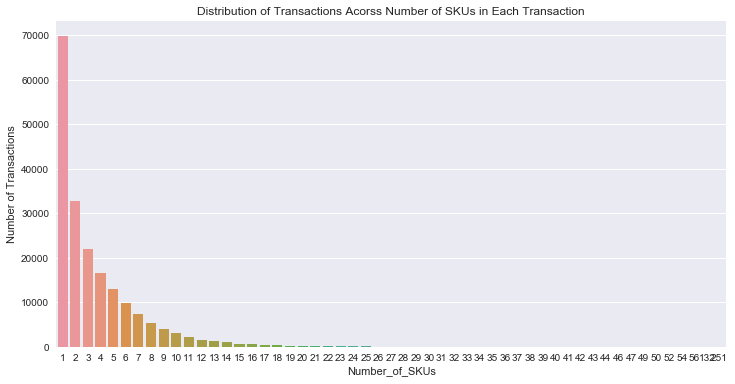

In [92]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Number_of_SKUs',y='Number_of_Transactions',data=df3_1)
plt.ylabel('Number of Transactions')
#plt.ylim(0,15000)
plt.title('Distribution of Transactions Acorss Number of SKUs in Each Transaction')
#plt.tick_params(axis='x',bottom='off',labelbottom='off')

Avearge number of unique SKUs in each transaction is 3.6. We can see from the plot, most of transactions concentrate on number of SKUs range from 1-10.